Arket rekner ut ekstremverdier for klimadata. Koden er hentet fra NVE rapport 2014/22

In [1]:
# Fetch code:
#source("http://folk.uio.no/trondr/R/gev_colestawn_prior_with_sep_gev_dist.R")
source("C:/R/gev_colestawn_prior_with_sep_gev_dist.R")


In [2]:
y=scan("C:/Users/jan.aalbu/OneDrive - Asplan Viak/Koding/Ekstremverdier/ershovdstolane_maks_3dogn_sno.txt")

In [3]:
r=gev.ksidist.result(y,ksi.lower=0.028,ksi.upper=0.062)
# gev.ksi.result takes an array of yearly maximums and
# returns a list of properties found, that can be used in the
# methods gev.returnvalue.meanpar,
# gev.returnvalue.medianpar, gev.returnvalue.quantile
# and gev.returnvalue.mean.
# It has the following options:
# T10.95.lower: Lower limit in the prior of the 95% credibility band for the 10
# year return value (T10). Default:3
# T10.95.upper: Upper limit in the prior of the 95% credibility band for the 10
# year return value (T10). Default:600
# T100_T10.95.lower: Lower limit in the prior for the 95% credibility band of
# T100-T10. Default:3
# T100_T10.95.upper: Upper limit in the prior for the 95% credibility band of
# T100-T10. Default:600
# mcmc.numsamples: Number of MCMC samples. Default:1000
# mcmc.burnin: Number of bunr-in samples. Default:10000
# mcmc.spacing: Number of MCMC iterations between each sample. Default:10
# mcmc.numtemp: Number of tempering chains used in the MCMC algorithm.

In [4]:
#Default:1
# (no extra tempering chains)
print("100 års returverdi")
gev.returnvalue.quantile(r,100,0.5)
# Get T100 median estimate
print("1000 års returverdi")
gev.returnvalue.quantile(r,1000,0.5)
# Get T1000 median estimate
print("5000 års returverdi")
gev.returnvalue.quantile(r,5000,0.5)
# Get median and mean parameter estimates:
r$par.median
r$par.mean
# 95% credibility band:
r$par.95cred

[1] "100 års returverdi"


[1] 45.64152

[1] "1000 års returverdi"


[1] 60.03302

[1] "5000 års returverdi"


[1] 70.97606

$mu
[1] 20.93387

$sigma
[1] 4.849848

$ksi
[1] 0.04441033

$mu
[1] 20.97818

$sigma
[1] 4.869747

$ksi
[1] 0.04437319

$mu
    2.5%    97.5% 
19.73748 22.43004 

$sigma
    2.5%    97.5% 
4.032826 5.912636 

$ksi
      2.5%      97.5% 
0.02811696 0.06097827

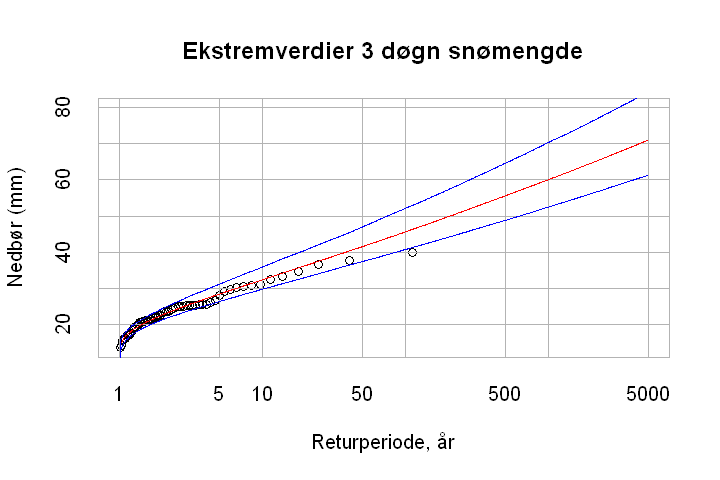

In [5]:
# Plot median return values
options(repr.plot.width=6, repr.plot.height=4)
# First, plot data:
n=length(y)
plot((n+0.12)/(1:n-0.44),sort(y,decreasing=T),log="x",xlim=c(1,5000),ylim=c(min(y),max(y)*2),main='Ekstremverdier 3 døgn snømengde',xlab="Returperiode, år", ylab="Nedbør (mm)",tck=1,fg=grey(0.7))

# Median return values for return period going from 1 to 5000 years:
returntimes=exp(seq(0,log(5000),0.01))
lines(returntimes,gev.returnvalue.quantile(r,returntimes,
0.5),col="red")
# 95% credibility interval:
lines(returntimes,gev.returnvalue.quantile(r,returntimes,0.025),col="blue")
lines(returntimes,gev.returnvalue.quantile(r,returntimes,0.975),col="blue")
